## Bike Sharing System Data Exploration and Visualization

 by Renato Meira

### Dataset

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Note that this dataset will require some data wrangling in order to make it tidy for analysis.


### Import Packages

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [2]:
var = 'vamosver'
var

'vamosver'

In [45]:
#configuração da dimensões da tela de apresentação
from notebook.services.config import ConfigManager
cm = ConfigManager()

#defina as dimensões da apresentação.
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
         })

{'width': 1000, 'height': 600, 'scroll': True}

### Gathering and Assessing Data

In [ ]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [48]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [51]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Cleaning Data

In [52]:
# make a copy of the dataframe 
# fix multiple fields that are not in the correct dtype

df_bike = df.copy()
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

df_bike['start_station_id'] = df_bike['start_station_id'].astype('str')
df_bike['end_station_id'] = df_bike['end_station_id'].astype('str')
df_bike['bike_id'] = df_bike['bike_id'].astype('str')

df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')

df_bike.info(null_counts=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

C:\Users\RENATO~1.MEI\AppData\Local\Temp/ipykernel_17560/180301834.py:15: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_bike.info(null_counts=True);


In [53]:
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [54]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [55]:
df_bike['start_hourofday'] = df_bike.start_time.dt.hour

In [56]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week

df_bike['duration_minute'] = df_bike['duration_sec']/60

df_bike['start_date'] = df_bike.start_time.dt.date
df_bike['start_hourofday'] = df_bike.start_time.dt.hour
df_bike['start_dayofweek'] = df_bike.start_time.dt.day_name()

df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hourofday,duration_minute,start_date,start_dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,869.750000,2019-02-28,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,708.683333,2019-02-28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,1030.900000,2019-02-28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,608.166667,2019-02-28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,26.416667,2019-02-28,Thursday


In [57]:
# add a new column calculating riders' age from 'member_birth_year'

df_bike['member_age'] = 2019 - df_bike['member_birth_year']
df_bike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_hourofday,duration_minute,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,13.458421,12.101307,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,4.724978,29.906496,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,1.016667,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,9.000000,5.416667,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,14.000000,8.566667,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,17.000000,13.266667,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,23.000000,1424.066667,141.000000


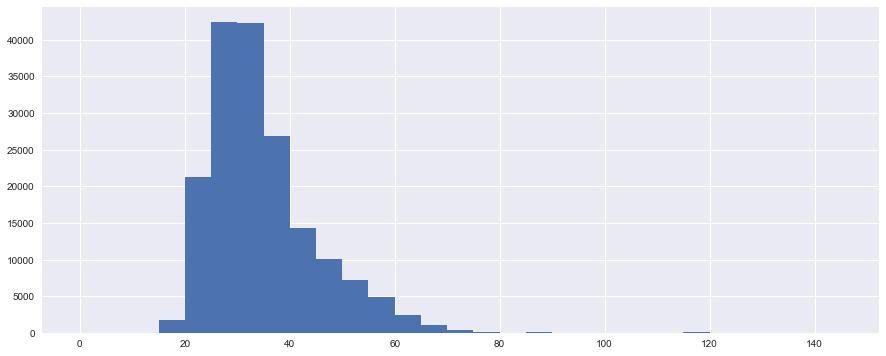

In [58]:
# plot the distribution of members' age, visually examine for some outliers over 100 yrs old

plt.figure(figsize=[15, 6])
bins = np.arange(0, df_bike['member_age'].max()+5, 5)
plt.hist(df_bike['member_age'].dropna(), bins=bins);

c:\users\renato.meira\envs\stat_gw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='member_age'>

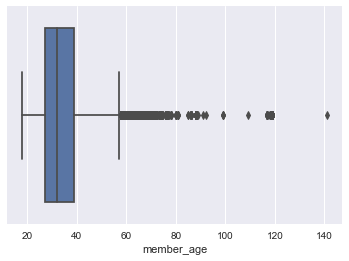

In [59]:
sns.boxplot(df_bike['member_age'])

In [60]:
# filter out outlier ages from visually examination of the distribution above
# we can note that the age that is outside the interquartile between 
# 20 and 60 years old is already considered outliers, so we will only analyze the set of information up to 60 years old.

df_bike = df_bike.query('member_age <= 60')

### Overview about Fordbike's dataset

the fordbike's dataset has 174.295 rows about trip records contains 16 variables. there are three main variable in dataset that i mention bellow: 

   - trip's information: 
       - duration_sec, 
       - start_time, 
       - end_time
       

   - station's information: 
       - start_station_id, 
       - start_station_name, 
       - start_station_latitude, 
       - start_station_longitude, 
       - end_station_id, 
       - end_station_name, 
       - end_station_latitude, 
       - end_station_longitude
       

   - member's information: 
       - bike_id, 
       - user_type, 
       - member_birth_year, 
       - member_gender, 
       - bike_share_for_all_trip
       
       
Variable created to help in analyses:

   - trip's information: 
       - duration_minute, 
       - start_date, 
       - start_hourofday, 
       - start_dayofweek, 
       - start_month


   - member's information: 
       - member_age

### Univariate Exploration

Let's start our exploration by looking at the main variable of interest: hour-of-day, day-of-week. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

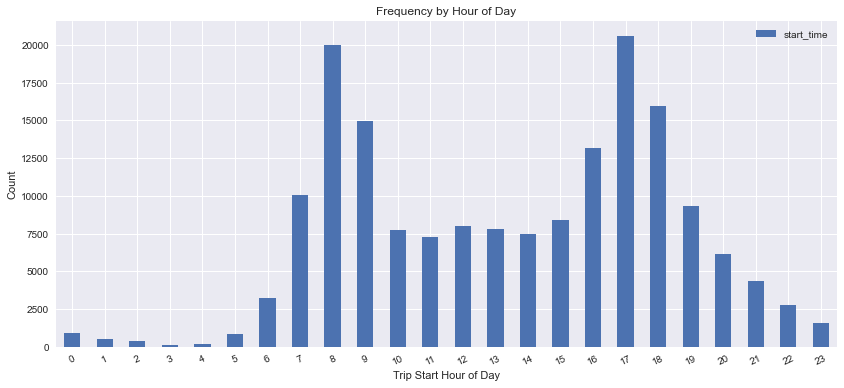

In [61]:
# trip distribution over day hours
hour_groupby =  df_bike.groupby('start_hourofday')['start_time'].count().reset_index()
plt.rcParams['figure.figsize'] = 14, 6
base_color = sns.color_palette('colorblind')[0]


hour_groupby.plot(y= 'start_time' , x='start_hourofday', kind='bar');
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.title('Frequency by Hour of Day');

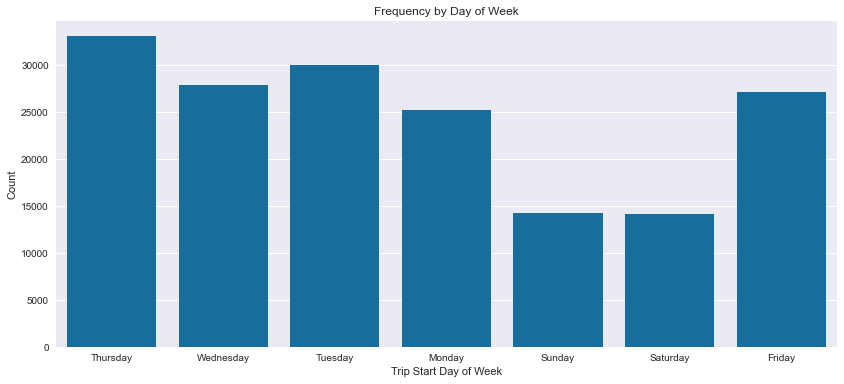

In [62]:
# trip distribution over weekdays
# cast 'start_dayofweek' to category dtype

sns.countplot(data=df_bike, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Frequency by Day of Week');

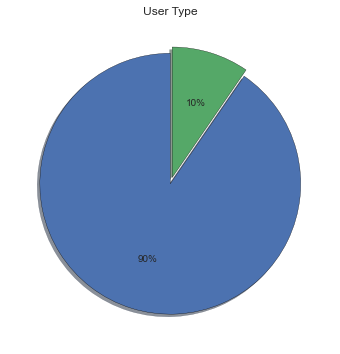

In [63]:
plt.title('User Type');
explode = (0, 0.05)
plt.pie(df_bike['user_type'].value_counts(), startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True);
plt.show()

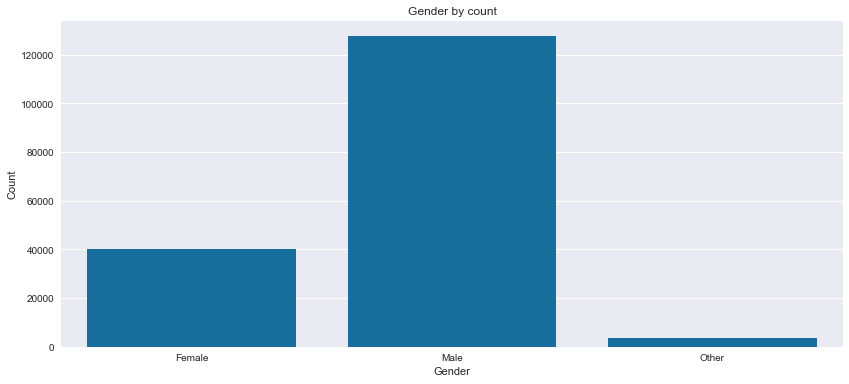

In [64]:
sns.countplot(data=df_bike, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Gender by count')
plt.show();

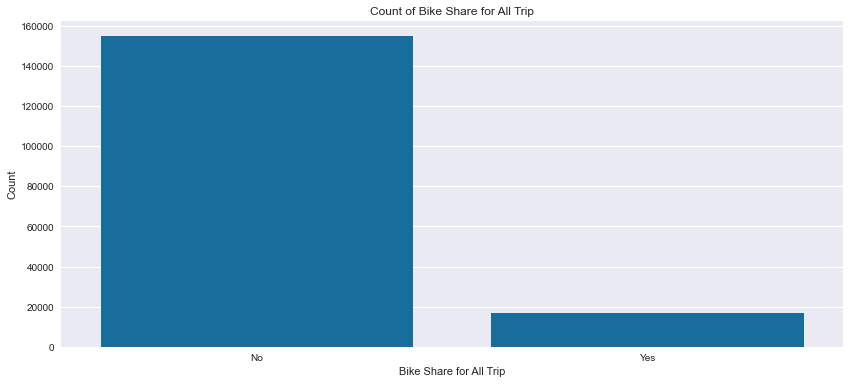

In [65]:
sns.countplot(data=df_bike, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count')
plt.title('Count of Bike Share for All Trip');
plt.show()

In [66]:
# Interval Confidence 95 of Member Age
np.percentile(df_bike['member_age'], 2.5), np.percentile(df_bike['member_age'], 97.5)

(21.0, 56.0)

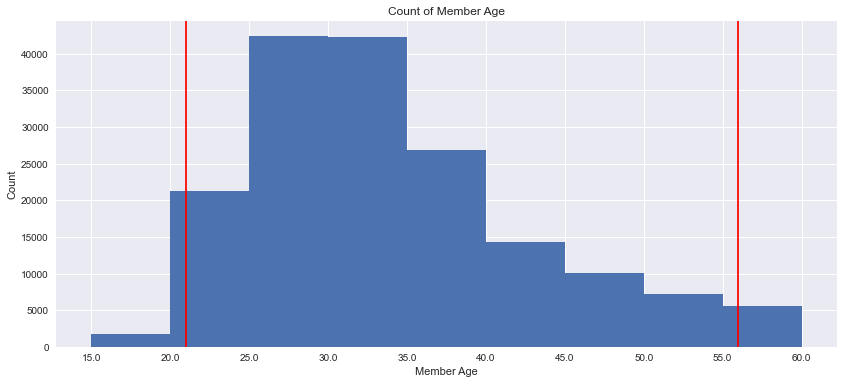

In [67]:
bins = np.arange(15, df_bike['member_age'].max()+5, 5)
plt.hist(data=df_bike, x='member_age', bins=bins);
plt.axvline(np.percentile(df_bike['member_age'], 2.5), color = 'red')
plt.axvline(np.percentile(df_bike['member_age'], 97.5), color = 'red')
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');
plt.title('Count of Member Age');

In [68]:
# trip distribution over start Station 
stat_station_groupby =  df_bike.groupby('start_station_name')['start_time'].count().reset_index()
plt.rcParams['figure.figsize'] = 14, 6
stat_station_groupby.sort_values('start_time', ascending=False ).head()

,start_station_name,start_time
199,Market St at 10th St,3626
260,San Francisco Caltrain Station 2 (Townsend St...,3314
82,Berry St at 4th St,2880
220,Montgomery St BART Station (Market St at 2nd St),2667
241,Powell St BART Station (Market St at 4th St),2568


Most subscribers were male and we observed that the age distribution will have a reliable range between 21 and 56 years. We can also see that trips usually take place on Tuesday and Thursday more frequently.
Using the age distribution, we evaluated that the use of the bicycle sharing service is lower for older ages.

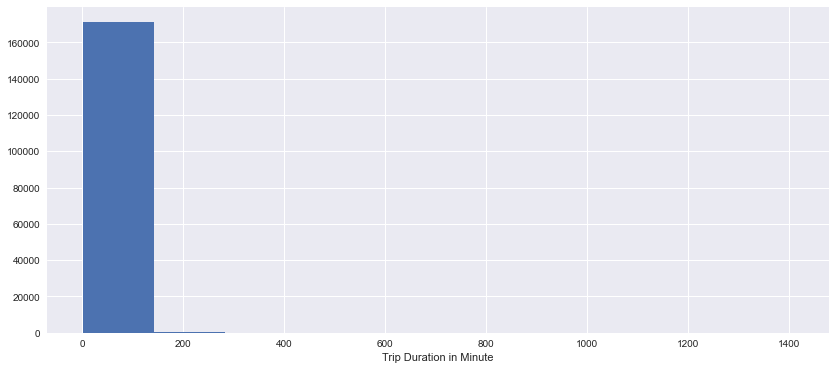

In [69]:
plt.hist(data=df_bike, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

In [70]:
df_bike['duration_minute'].describe(percentiles=[.25, .50, .75, .99])

count    171617.000000
mean         11.724008
std          27.567113
min           1.016667
25%           5.383333
50%           8.500000
75%          13.116667
99%          52.933333
max        1409.133333
Name: duration_minute, dtype: float64

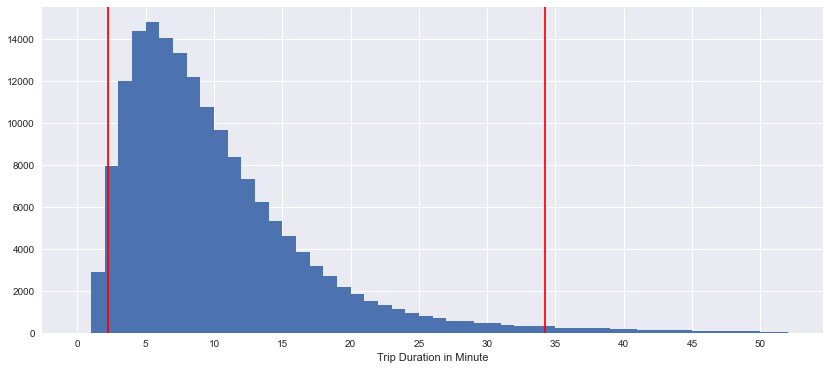

In [71]:
bins = np.arange(0, 53, 1)
ticks = np.arange(0, 53, 5)
plt.hist(data=df_bike, x='duration_minute', bins=bins);
plt.axvline(np.percentile(df_bike['duration_minute'], 2.5), color ='red')
plt.axvline(np.percentile(df_bike['duration_minute'], 97.5), color ='red')
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

In [72]:
# Interval Confidence of duration minute
round(np.percentile(df_bike['duration_minute'], 2.5),2), round(np.percentile(df_bike['duration_minute'], 97.5),2)

(2.23, 34.22)

In [73]:
# filter out outlier trip records where the duration was very long

df_bike = df_bike[df_bike['duration_minute'] < 53]
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hourofday,duration_minute,start_date,start_dayofweek,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23,26.416667,2019-02-28,Thursday,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,23,29.883333,2019-02-28,Thursday,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983.0,Female,No,23,19.116667,2019-02-28,Thursday,36.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989.0,Male,No,23,26.916667,2019-02-28,Thursday,30.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988.0,Other,No,23,26.166667,2019-02-28,Thursday,31.0


In [74]:
# save the clean data to a .csv file
df_bike.to_csv('fordgobike_201902_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?


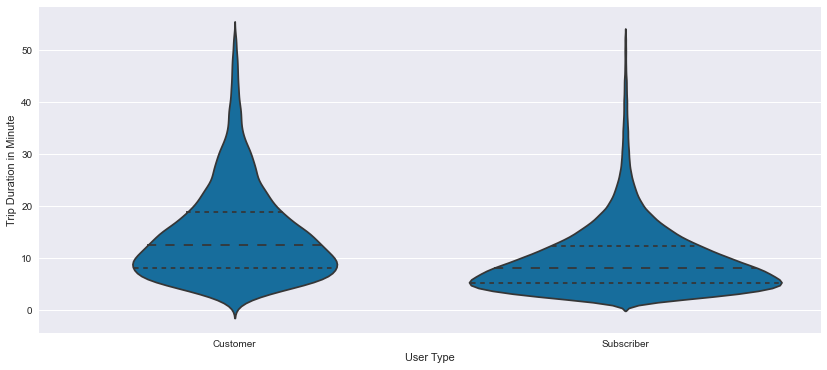

In [75]:
sns.violinplot(data=df_bike, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

We can note that the frequency of trip duration is much lower among subscribers and casual pilots. I believe there is a different goal between the profiles, maybe the subscriber has a goal of getting around, for example from work to home,
while the casual rider seems to take the rides for entertainment.

How does the frequency of trip duration differ between genders?

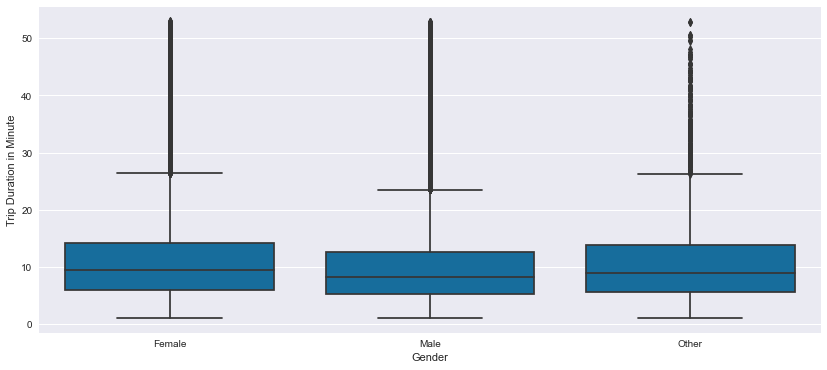

In [76]:
sns.boxplot(data=df_bike, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

As we can see in the graph above, we can assess that male passengers tend to make shorter trips, as we see that the average is a little lower compared to other genders.

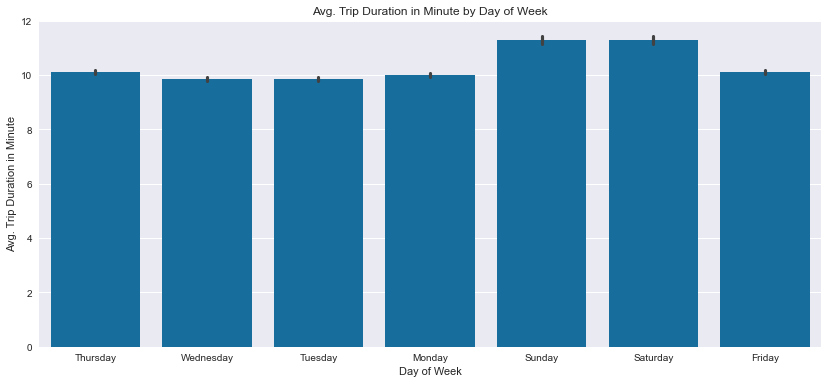

In [77]:
sns.barplot(data=df_bike, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Avg. Trip Duration in Minute by Day of Week');

We can see in the chart above that there is a profile among users who use the system on the weekend and for a week, showing how sharing usage personas

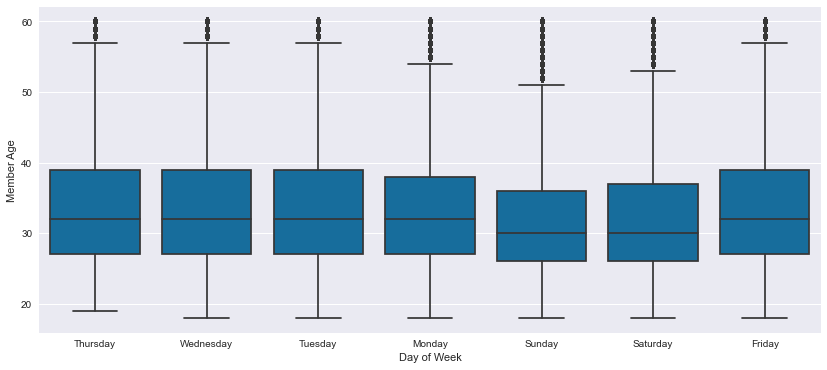

In [78]:
sns.boxplot(data=df_bike, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');


We can see that the age of users differs between weekends, with an average of 30 years, while we observe an increase in age on weekends.

### Weekly usage between customers and subscribers

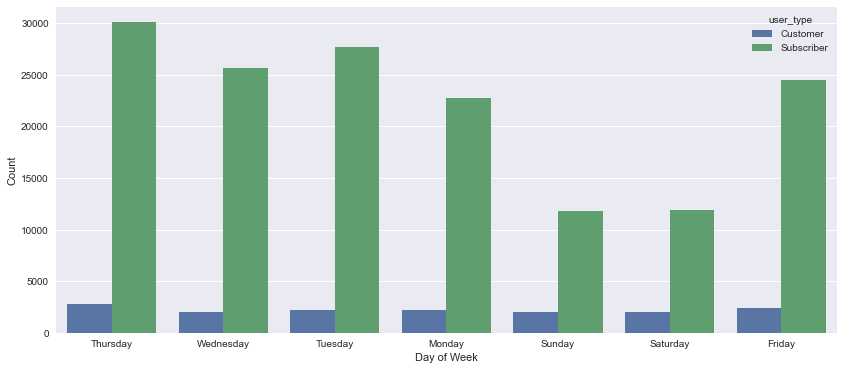

In [79]:
sns.countplot(data=df_bike, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

In the Chart above, we can see that the use of the subscriber sharing system has a drop on the weekend, further confirming the theory of using the service for specific routes

### Daily usage between customers and subscribers

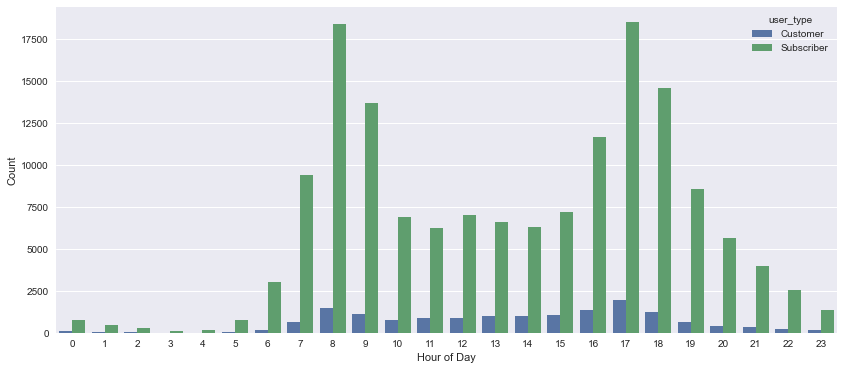

In [80]:
sns.countplot(data=df_bike, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

The use of the sharing service is higher during 'Rush' hours, I believe due to entering work, approximately 8 am, and leaving, between 5 pm and 6 pm.
We can also point out that the distribution of customers is very even during the day!

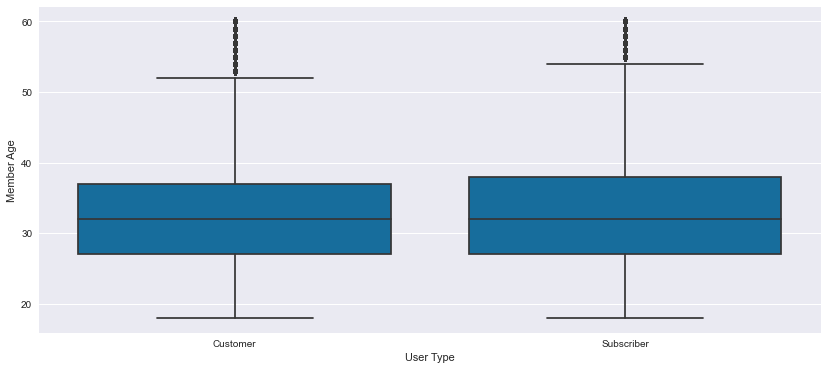

In [81]:
sns.boxplot(data=df_bike, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');


### Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?


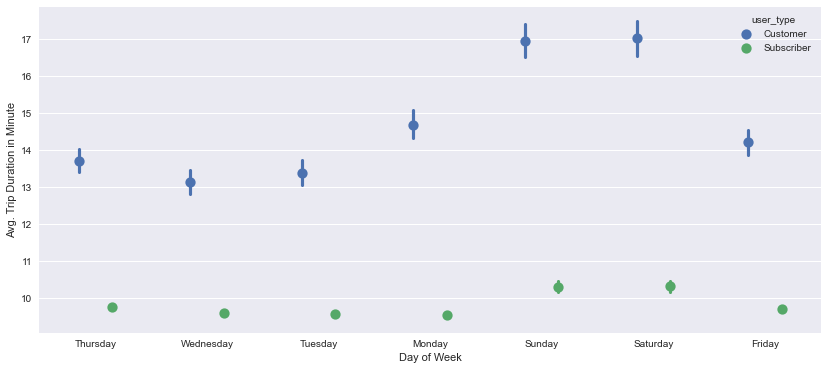

In [82]:
sns.pointplot(data=df_bike, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

In this chart, we assess the average time between customers and subscribers, and we can see that there is a different behavior between the two groups.
The use of customers is longer and Subscribers travel an average of 10 minutes, showing that the system proposal is for both groups.

what is the hourly usage between subscribers and customer?

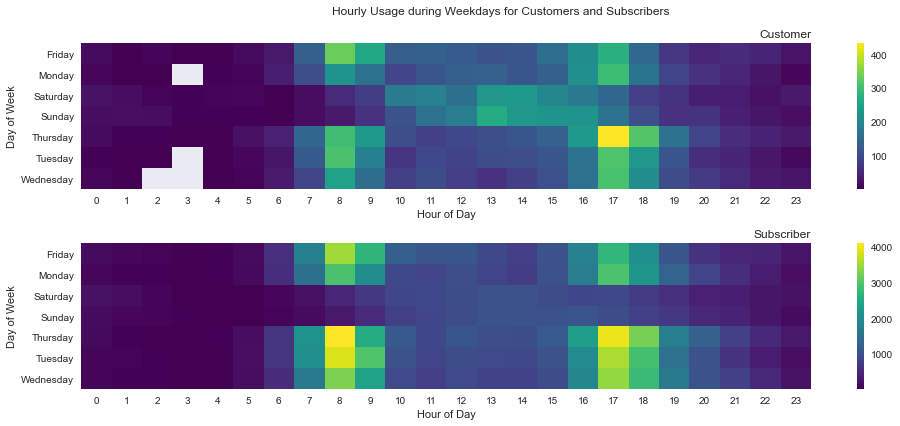

In [83]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.rcParams['figure.figsize'] = 14, 6
plt.subplot(2, 1, 1)
customers = df_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='viridis');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout()

plt.subplot(2, 1, 2)
subscribers = df_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(st_counts, cmap='viridis');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout()

As shown in the heat map above, we can verify that the behavior between the two groups is totally different, as previously positioned. The proposal of using the complete system is the most acidic use on the weekend for clients and the commuting of the Subscriber, perhaps between work and home.

had one more relevant information:

- generally the time of use of the service is between 7 and 9 am, in both groups.

### Conclusion

From the exploration, we can ascertain the behavior of using the service for users discriminated as customer and subscriber. We can see from the proposed analysis that customers use the sharing system for entertainment and leisure, as it provides greater use on weekends and average travel time, while the subscriber uses it to get around more often for a week, usually for displacement, example home to work, gym to home, among others.

We were able to conclude that the age that most uses the bike sharing service (Using Confidence Interval) is between 21 and 56 years old.
We can also assess that the days of weeks that are most used are Tuesday and Thursday.
Finally, we can achieve that, the sharing system is efficient for both users who want to move to leisure.

In [41]:
#!jupyter nbconvert --execute --to html exploration_template.ipynb

^C
